# Life Expectancy and GDP Project

### Prepare for the work

First thing first, import all the libraries needed to handle this project:

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data from the original csv file, named "all_data.csv"

In [15]:
all_data = pd.read_csv("all_data.csv")

### First glance

And inspect the dataset's first rows to get acquainted with it!

In [360]:
all_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


This first overview shows us a *pretty consistent record*, being Chile the only Country we can actually see. 

Would the situation change if we get a *different sample*?

In [561]:
all_data.sample(5)

,Country,Year,Life expectancy at birth (years),GDP
80,Zimbabwe,2000,46.0,6.689958e+09
16,China,2000,71.7,1.211350e+12
18,China,2002,72.7,1.470550e+12
25,China,2009,74.9,5.109950e+12
41,Germany,2009,80.0,3.418010e+12


Good: Chile wasn't really the only Country represented. Let's proceed!

### Get to know the data

Now that we have had a first glance at our dataset, let's fetch some more info about it:

In [17]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


So... The dataset comprises 96 rows, four columns and no missing values. That's good to hear! 

We now want to **know a bit more** about these columns and the values inside them. 

The first one is named *Country*. 
In the previous step, we saw a handful of countries showing up in our sample. To check for other possible entries, we are going to **get all the unique values** in this column.

In [487]:
unique_countries = list(all_data.Country.unique())

print(unique_countries)

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']


Perfect! We are sure we will handle data regarding Chile, China, Germany, Mexico, United States of America and Zimbabwe.

We can apply the same logic to the *Year* column. 

In [40]:
unique_years = all_data.Year.unique()

print(unique_years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


2000 to 2015, this is our dataset timespan, and we have no missing years in between.

**Time to ask ourselves some questions!**

### Question n. 1: Has life expectancy increased over time in the six nations?

In order to address this question, we will inspect the relationship between Life Expectancy at Birth (years) and Country over Years.

Since we are trying to visualize the **variation of some data** (in our case *Life Expectancy at Birth*) over a time period for multiple countries, let's generate a *multi-line graph* using Python's **Seaborn library**:

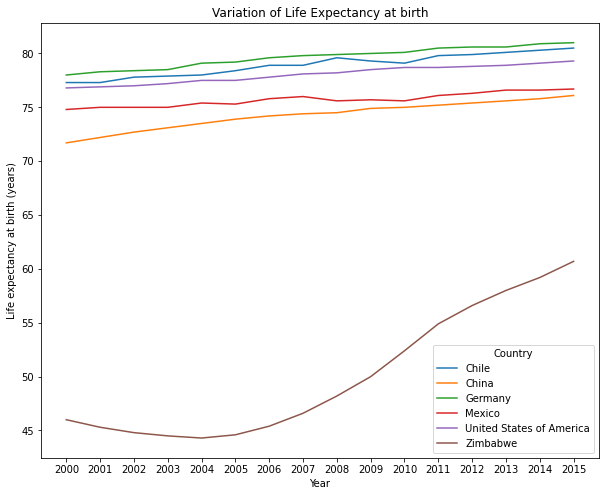

In [20]:
plt.figure(figsize = (10, 8))
ax = sns.lineplot(data = all_data, x = "Year", y = "Life expectancy at birth (years)", hue = "Country")
ax.set_xticks(ticks = unique_years)
ax.set_title("Variation of Life Expectancy at birth")
plt.show()

This visualization gives us a first insight into the data. 

One Country's record, **Zimbabwe**, lies on the *lower half of the axis*, with values ranging from ca. 45 to 60. All other countries have values ranging from roughly 70 to 80. 

We can make two main observations: 

- At the beginning of the XXI century, Zimbabwe's Life Expectancy at Birth was close to 45 years, while in other countries it was between 70 and 80 years, with lower values associated with China and higher ones with Germany.


- In 2015 there was still a gap in the difference between Zimbabwe's Life Expectancy at Birth and the other represented countries' Life Expectancy, despite the former clearly showing a growing trend. 

In order to better understand these data, let's try and *split the relative visualizations* by creating two subsets from the original dataset, one including all countries' data but those of Zimbabwe's, and one dedicated to this Country.

- First subset, *all countries except Zimbabwe*:

In [583]:
# This is the all_data DataFrame subset:
first_subset = all_data[all_data["Country"] != "Zimbabwe"]

#This is the subset of the unique_contries list, obtained by slicing off the last element from the original list:
first_subset_countries = unique_countries[ : -1]

- Second subset, *Zimbabwe only*:

We can obtain these informations by using Zimbabwe as a filter on our original DataFrame

In [609]:
zimbabwe_subset = all_data[all_data["Country"] == "Zimbabwe"]

In order to make our plot more informative, we may want to add the exact values for Life Expectancy at Birth for each Country represented. In order to *not over-clutter* the graph, though, we will select data only from 2000 and 20015.

Select y values for our first subset by defining a **function** and using a **for loop** able to generate a **list of all the values** we need:

In [496]:
def y2000values():
    values_2000total = []
    for i in first_subset_countries:
        values_2000 = list(first_subset.loc[(first_subset.Year == 2000) & (first_subset.Country == i), 'Life expectancy at birth (years)'])[0]
        values_2000total.append(values_2000)
    return values_2000total

In [497]:
y_2000values = y2000values()

In [498]:
def y2015values():
    values_2015total = []
    for i in first_subset_countries:
        values_2015 = list(first_subset.loc[(first_subset.Year == 2015) & (first_subset.Country == i), 'Life expectancy at birth (years)'])[0]
        values_2015total.append(values_2015)
    return values_2015total

In [499]:
y_2015values = y2015values()

Select *y* values for Zimbabwe:

In [500]:
ZW_2000 = list(zimbabwe_subset.loc[(zimbabwe_subset.Year == 2000), 'Life expectancy at birth (years)'])[0]
ZW_2015 = list(zimbabwe_subset.loc[(zimbabwe_subset.Year == 2015), 'Life expectancy at birth (years)'])[0]

Let's visualize the **data for Chile, China, Germany, Mexico and the United States of America**:

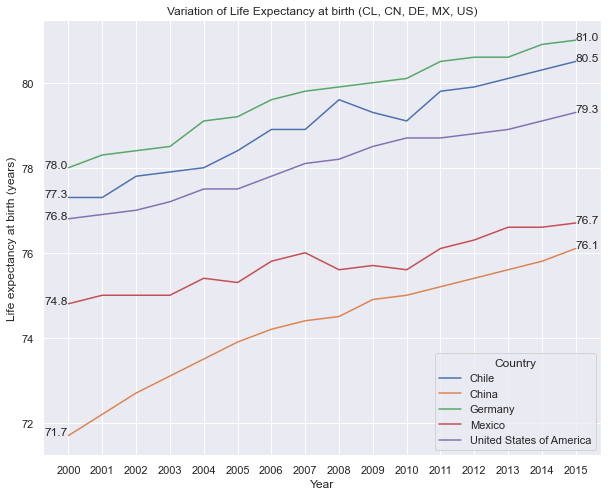

In [677]:
plt.figure(figsize = (10, 8))
ax = sns.lineplot(data = first_subset, x = "Year", y = "Life expectancy at birth (years)", hue = "Country")
ax.set_xticks(ticks = unique_years)
ax.set_title("Variation of Life Expectancy at birth (CL, CN, DE, MX, US)")

sns.move_legend(ax, "lower right")

for i in range(len(y_2000values)):
    plt.text(unique_years[0] - 0.7, y_2000values[i], y_2000values[i])
    plt.text(unique_years[-1], y_2015values[i], y_2015values[i])

plt.show()

And now those for **Zimbabwe**:

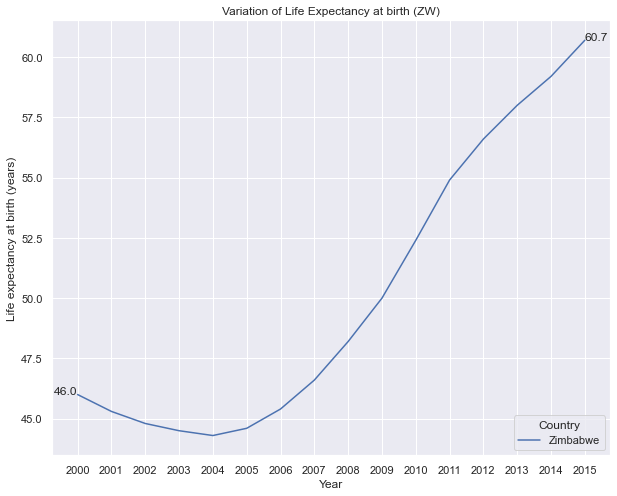

In [502]:
plt.figure(figsize = (10, 8))

ax = sns.lineplot(data = zimbabwe_subset, x = "Year", y = "Life expectancy at birth (years)", hue = "Country")
ax.set_xticks(ticks = unique_years)
ax.set_title("Variation of Life Expectancy at birth (ZW)")

sns.move_legend(ax, "lower right")

plt.text(unique_years[0] - 0.7, ZW_2000, ZW_2000)
plt.text(unique_years[-1], ZW_2015, ZW_2015)

plt.show()

**Interesting facts:**

According to the World Health Organization, Life Expectancy at Birth has grown by five years, going from an average of **67 years in 2000** to **72 years in 2015**. 

For reference, and some more informations, check out the official data and method of estimation at these links: 
- https://www.who.int/data/gho/data/indicators/indicator-details/GHO/life-expectancy-at-birth-(years)
- https://www.who.int/data/gho/indicator-metadata-registry/imr-details/3131

This project's dataset is a small portion of these data, with only six countries represented: Chile, China, Germany, Mexico, the United States of America and Zimbabwe. 

Our graphs indicate that five out of six countries had, back in 2000, an higher Life Expectancy at Birth than the average, while Zimbabwe lay well beneath this threshold, with 46.0 years being the value for the year. 

As of 2015, all the analyzed countries had shown an increase in Life Expectancy at Birth, with the most relevant gain connected to Zimbabwe, which went from 46.0 to 60.7, despite some low values in 2004, when Life Expectancy at Birth was only 44.3 years. 

All things considered, in 2015 the average Life Expectancy at Birth remained better for those who had an already good starting point in 2000, showing the graph no overlap between the plotted lines. 


### Question n. 2: Has GDP increased over time in the six nations?

In order to address this question, we will inspect the relationship between *GDP in Trillions of U.S. Dollars* and *Country* over *Years*.

Since we are trying, once more, to visualize the **variation of some data** (in this case *GDP*) over a time period for multiple countries, let's generate a multi-line graph using Python's **Seaborn library:**

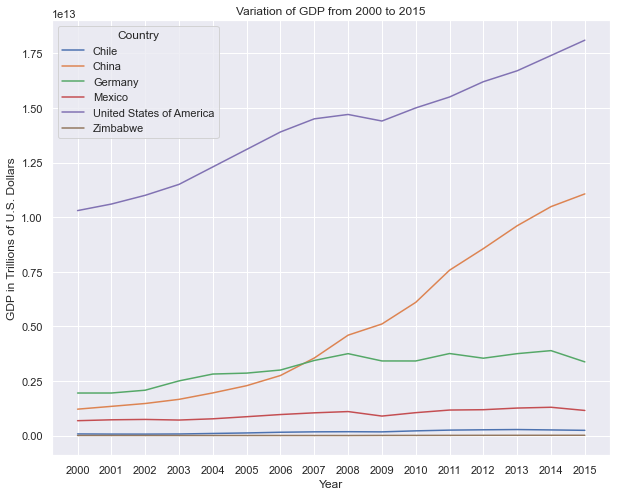

In [568]:
plt.figure(figsize = (10, 8))
ax = sns.lineplot(data = all_data, x = "Year", y = "GDP", hue = "Country")
ax.set_xticks(ticks = unique_years)
ax.set_title("Variation of GDP from 2000 to 2015")
ax.set_xlabel("Year")
ax.set_ylabel("GDP in Trillions of U.S. Dollars")
plt.show()

This multi-line graph shows the existance of **note-worthy differences between countries' GDP**, making it difficult to appreciate each Country's unique behaviour. 

Re-plot these lines independently:

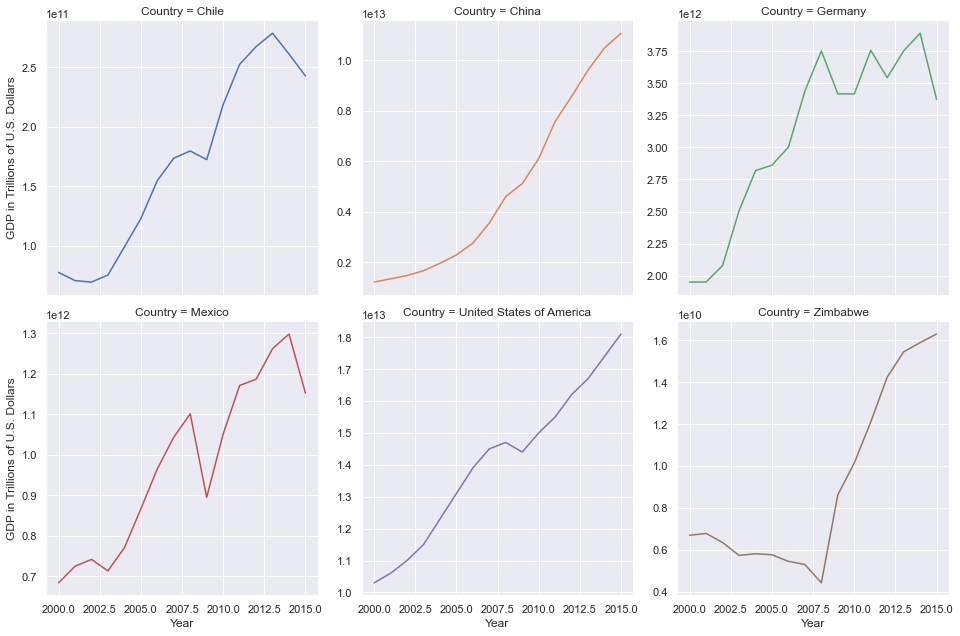

In [758]:
ax_gdp = sns.FacetGrid(all_data, col = "Country", col_wrap = 3, height = 4.5, hue = "Country", sharey = False)
ax_gdp_show = ax_gdp.map(sns.lineplot, "Year", "GDP").set_axis_labels("Year", "GDP in Trillions of U.S. Dollars")
plt.show()

We are able to see that **each Country's GDP increased overall from 2000 to 2015**. 

In addition, we can pinpoint two more appearent characteristics: 

- All the graphs show some sort of *depression from ca. 2007 to 2009*, less evident for China.


- Some graphs show an abrupt *decrease in GDP around 2013* (Chile) *and 2014* (Germany, Mexico).

Let's try and emphasize these points by adding some lines to our plot:

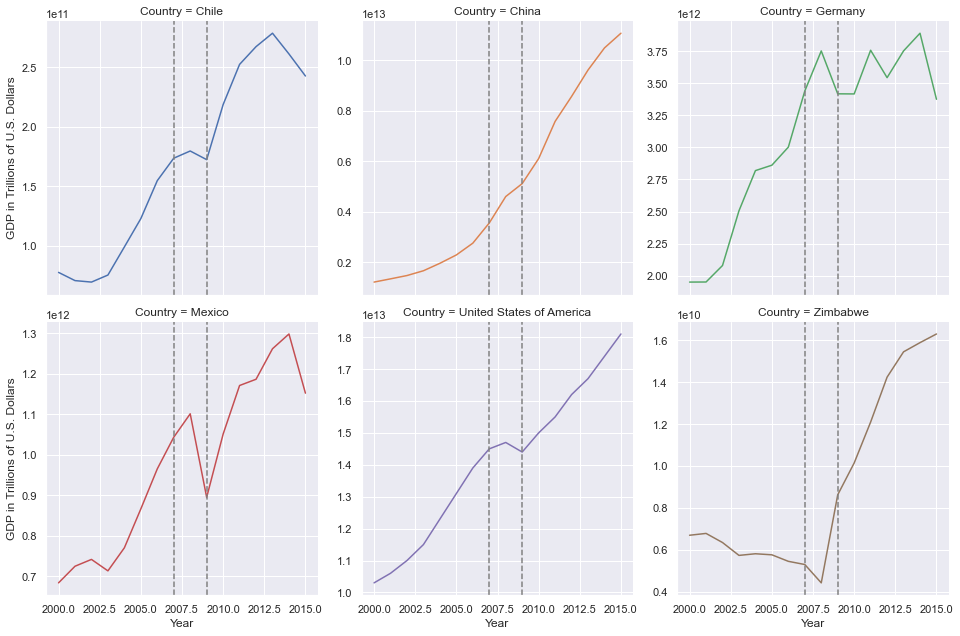

In [759]:
ax_gdp_show.refline(x = 2007)
ax_gdp_show.refline(x = 2009)
plt.show()

A quick research allows us to give these data a context. The 2007-2009 GDP values, in particular, are connected to what is now called **"The Great Recession"**, a period of market general decline.

More on the topic: 

- https://www.businessinsider.com/personal-finance/what-caused-the-great-recession?r=US&IR=T

- https://en.wikipedia.org/wiki/Great_Recession

### Question n. 3: Is there a correlation between GDP and life expectancy of a country?

Let's move on, and ask ourself if there is a correlation between GDP and life expectancy of a country.

- *Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate in relation to each other. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.*


- *A correlation coefficient is a statistical measure, of the degree to which changes to the value of one variable predict change to the value of another. When the fluctuation of one variable reliably predicts a similar fluctuation in another variable, there’s often a tendency to think that means that the change in one causes the change in the other. However, **correlation does not imply causation**. There may be, for example, an unknown factor that influences both variables similarly.*

More on the topic at the source: https://www.techtarget.com/whatis/definition/correlation

Since we are trying to visualise a possible correlation between GDP and Life Expectancy at Birth, we will use **Python's Seaborn library** to create **separate scatterplots**, one for each Country in our dataset.

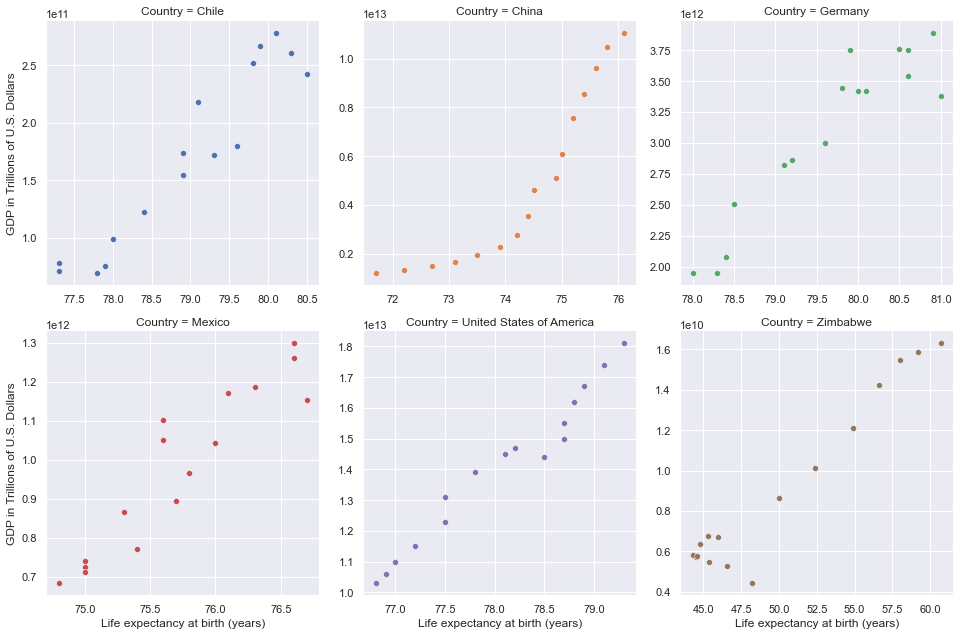

In [723]:
ax_gdple = sns.FacetGrid(all_data, col = "Country", col_wrap = 3, height = 4.5, hue = "Country", sharey = False, sharex = False)
ax_gdple.map(sns.scatterplot, "Life expectancy at birth (years)", "GDP").set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars")
plt.show()

These graphs show an organization of all the dots from bottom left to upper right, indicating the existence of a *positive linear correlation* between these two variables. 

Since we might ask ourselves how strong this **correlation** is, and if there are other possible correlations in the data, let's try and calculate all the correlations for our dataset, and then plot them as **readable heatmaps**, using once more the Python's **Seaborn library**:

In [586]:
def calculate_correlation():
    for i in unique_countries:
        correlation = all_data[all_data["Country"] == i].corr()
        plt.figure(figsize = (8, 6))
        sns.heatmap(correlation).set_title("Correlation coefficients for " + i)
        plt.show()

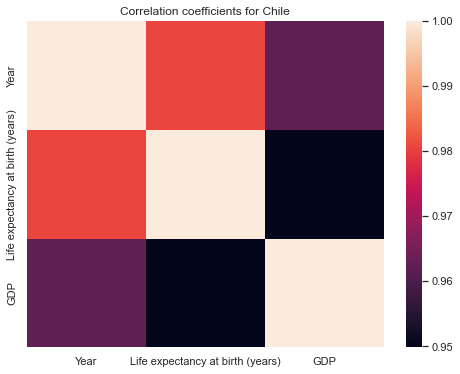

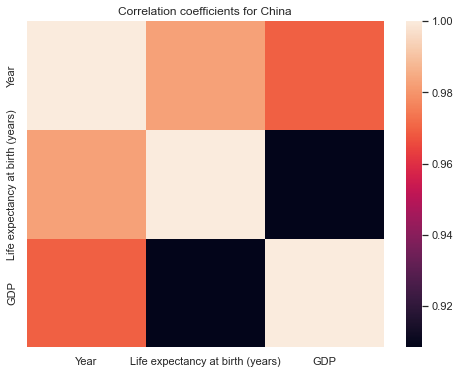

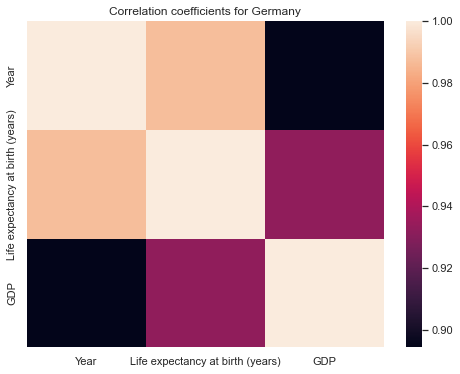

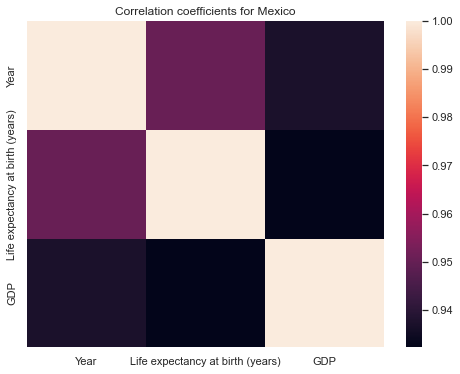

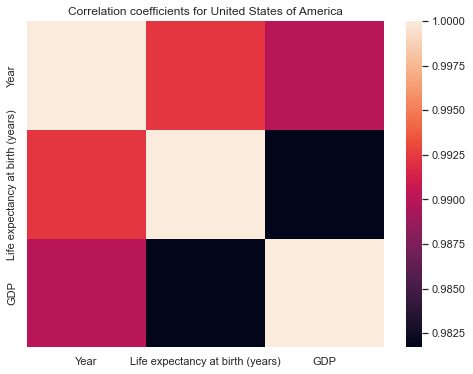

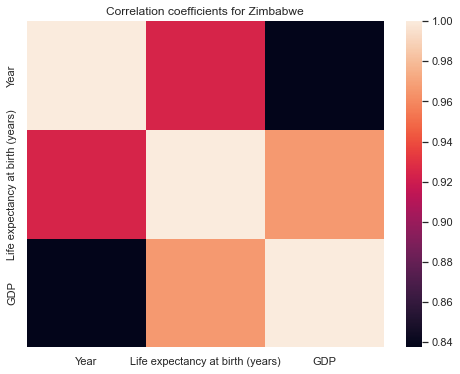

In [637]:
correlation_heatmaps = calculate_correlation()

These heatmaps confirm that **multiple positive correlations exist in our dataset**, some of wich have a really high strenght. This allows us to set the basis for further research.

### Question n. 4: What is the average life expectancy in these nations?

In order to address the question "What is the average life expectancy in these nations?" we can use a **barplot** which, *by default*, uses the height of each rectangle to show the **mean value** for a *numeric variable*. In addition to this, a barplot provides some indication of the *uncertainty around that estimate* using **error bars**.

Once again, we will use Python's **Seaborn Library**.

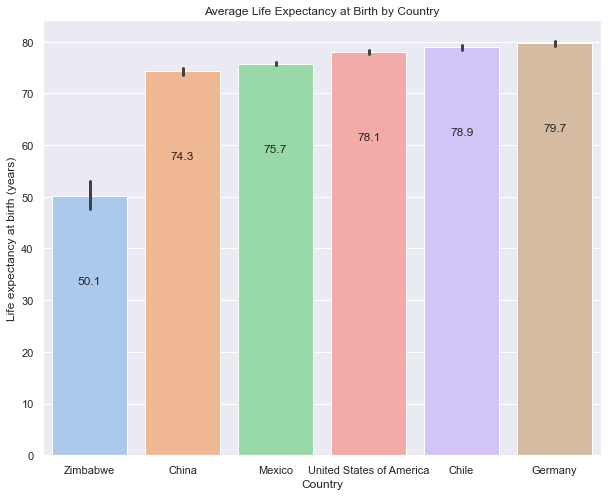

In [710]:
plt.figure(figsize = (10, 8))

result = all_data.groupby(["Country"])['Life expectancy at birth (years)'].mean().reset_index().sort_values('Life expectancy at birth (years)')

ax = sns.barplot(data = all_data, x = 'Country', y = 'Life expectancy at birth (years)', palette = "pastel", order = result['Country'], errwidth = 3)

for i in ax.containers:
    ax.bar_label(i, fmt = "%.1f", padding = - 90)
    
ax.set_title("Average Life Expectancy at Birth by Country")    

plt.show()

This graph shows the average Life Expectancy at Birth by Country, which equals 50.1 years in **Zimbabwe**. 

Going back to previous plots, we can *address the relevant margin of uncertainty* indicated for this Country, given the **rapid growth in Life Expectancy at Birth** the nation has experienced between 2000 and 2015. 

Data for the **remaining countries** reveals a *lower uncertainty* around the estimate, given the more contained growth in Life Expectancy at Birth experienced here. 

### Question n. 5: What is the distribution of that life expectancy?

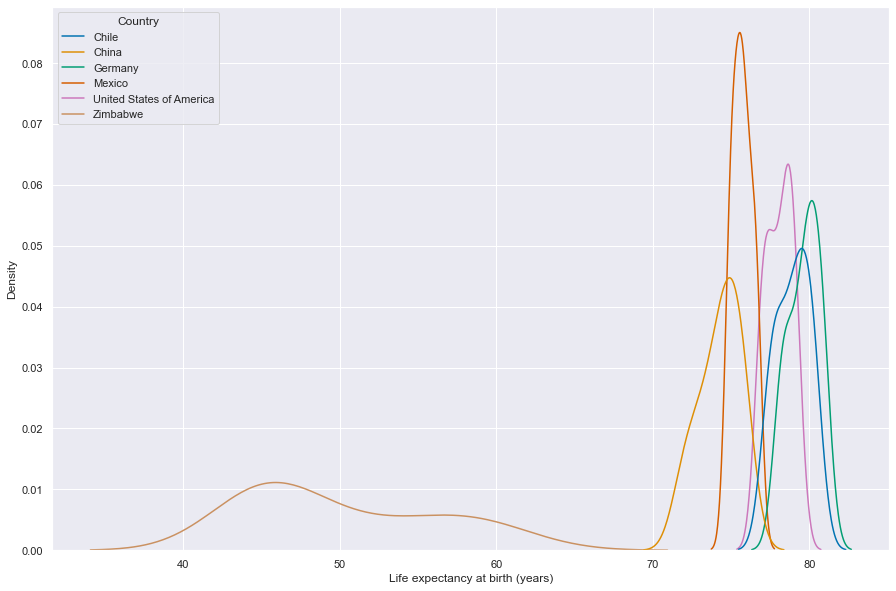

In [757]:
plt.figure(figsize = (15, 10))
sns.kdeplot(data = all_data, x = "Life expectancy at birth (years)", hue = "Country", palette = "colorblind")
plt.show()